In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from math import sqrt, exp, pi

# Ejercicio 6

Aplicando el algoritmo de Aceptación y rechazo se pide: <br>
a) Generar 2 distribuciones normales independientes. Una con media 10 y desvío 2, y la otra con media 20 y desvío 15.<br>
b) Muestre gráficamente las distribuciones de números al azar generadas.<br>
c) Calcular la media y la varianza de la distribución obtenida y compararlos con los valores teóricos.<br>
d) Utilizar las distribuciones generadas en el punto a) para generar una distribución normal bivariada.<br>
e) Graficar la distribución obtenida en el punto d).

Empezamos con la de media 10 y desvío 2:

In [2]:
amount = 10000
cota = sqrt(2*exp(1)/pi)
simulated = list()
real_distribution_numbers = list()

def X(x):
    return st.norm.pdf(x, loc = 0, scale = 1)

def Y(x):
    return exp(-x)

def probability(x):
    return X(x) / (Y(x) * cota)

accepted = 0
while accepted < amount:
    xi = np.random.exponential(1)
    ui = np.random.uniform()
    
    if (ui < probability(xi)):
        accepted += 1
        real_distribution_numbers.append(np.random.normal(10, 2))
        
        if(np.random.rand() < 0.5):
            simulated.append(xi)
        else:
            simulated.append(-xi)
            
result = [ n * 2 + 10 for n in simulated ]
result1 = result 

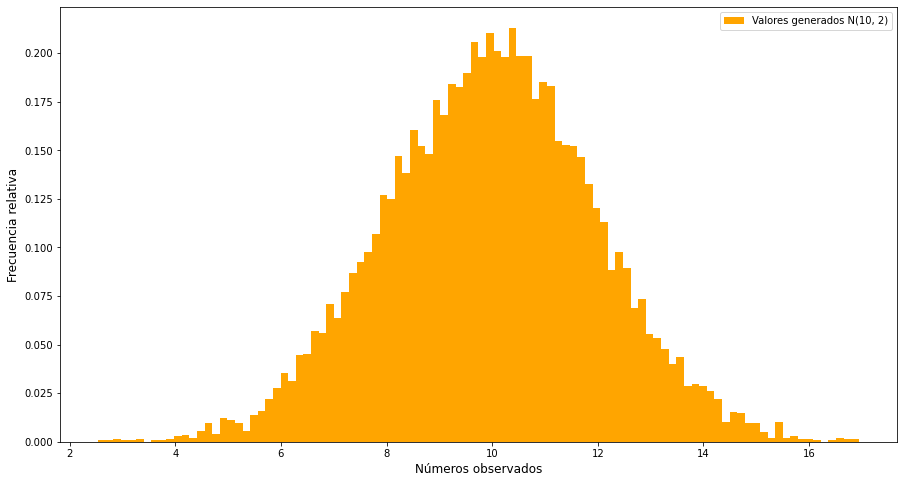

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))

ax.hist(result, 100, density=True, color="orange", label='Valores generados N(10, 2)')

plt.xlabel('Números observados', fontsize=12)
plt.ylabel('Frecuencia relativa', fontsize=12)

ax.legend()

In [4]:
print('Media = ', str(np.median(result)))
print('Varianza = ', str(np.var(result)))

Media =  9.980680084270114
Varianza =  3.9511368241308693


Que son valores muy similares a los teóricos.

Seguimos con la de media 20 y desvío 15:

In [5]:
amount = 10000
cota = sqrt(2*exp(1)/pi)
simulated = list()
real_distribution_numbers = list()

accepted = 0
while accepted < amount:
    xi = np.random.exponential(1)
    ui = np.random.uniform()
    
    if (ui < probability(xi)):
        accepted += 1
        real_distribution_numbers.append(np.random.normal(20, 15))
        
        if(np.random.rand() < 0.5):
            simulated.append(xi)
        else:
            simulated.append(-xi)
            
result = [ n * 15 + 20 for n in simulated ]
result2 = result

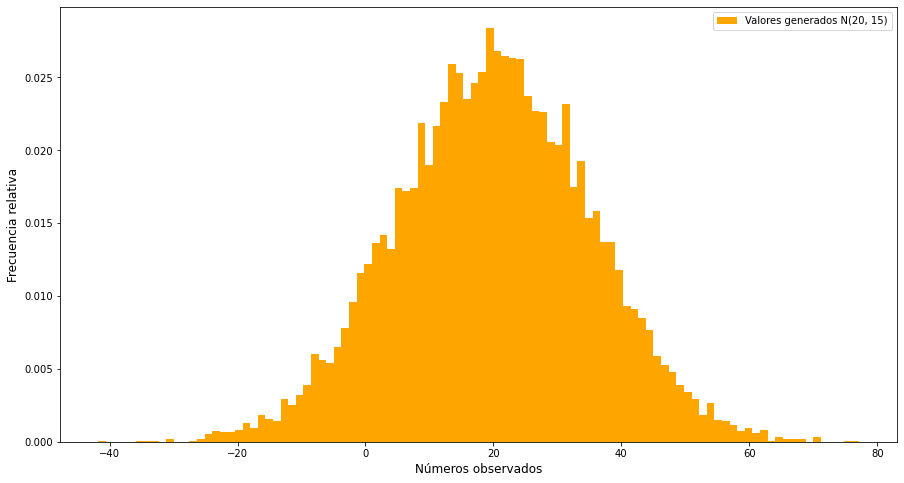

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))

ax.hist(result, 100, density=True, color="orange", label='Valores generados N(20, 15)')

plt.xlabel('Números observados', fontsize=12)
plt.ylabel('Frecuencia relativa', fontsize=12)

ax.legend()

Como las distribuciones normales del inciso a son independientes, la covarianza entre ellas es igual a 0. Luego el parámetro p resultante será 0. 
Entonces podemos calcular la normal bivariada como el producto entre las distribuciones normales.

Buscamos la distribucion bivariada

In [7]:
def normal_bivariada(X,Y,p):
    nb=[]
    for i in range (len(X)):
        nb.append(X[i]*Y[i])
    return nb

nb=normal_bivariada(result1,result2,0)
nb[:5]

[167.80164757269532,
 58.7298018124894,
 184.10396909528205,
 243.91040721575686,
 297.98396526477217]

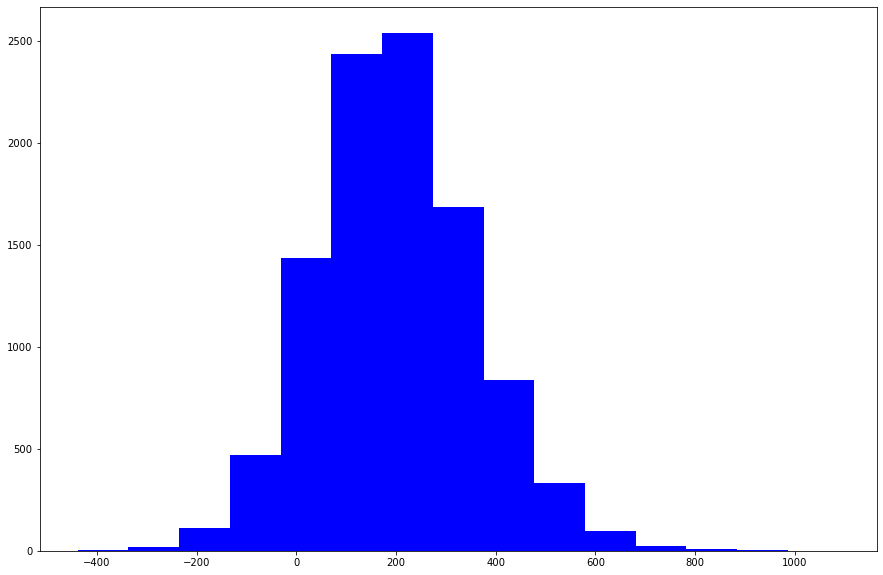

In [8]:
plt.figure(figsize=(15, 10))
plt.hist(nb,'sturges',color='blue')
plt.show()